### Micro-proyecto # 1
__Detección de paletas de color a partir de obras de arte.__

Autores: Andrés Vega, David Méndez Acuña

In [91]:
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

import matplotlib.cm as cm

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn_extra.cluster  import KMedoids
from sklearn.preprocessing import RobustScaler

In [133]:
def load_image(path, print=False):
    '''
    Load an image from a given path. This function returns the pixels matrix, each cell of the matrix is a 
    3-dimensional array with the RGB components of the pixel.
    '''
    image_matrix = imageio.imread(path)

    columns = len(image_matrix)
    rows = len(image_matrix[0])
    data = []

    for i in range(columns):
        for j in range(rows):
            color = image_matrix[i][j]
            R, G, B = color[0], color[1], color[2]
            data.append([R, G, B])

    data_frame = pd.DataFrame(columns=['R', 'G', 'B'], data=data)

    if print :   
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=False, sharey=False)
        axes[0] = plt.axes(projection='3d')
        axes[0].set_anchor('W')
        axes[0].scatter3D(data_frame.loc[:,"R"], data_frame.loc[:,"G"], data_frame.loc[:,"B"], c=data_frame/255.0)
        axes[1].imshow(image_matrix)

        fig.tight_layout()

    return image_matrix, data_frame


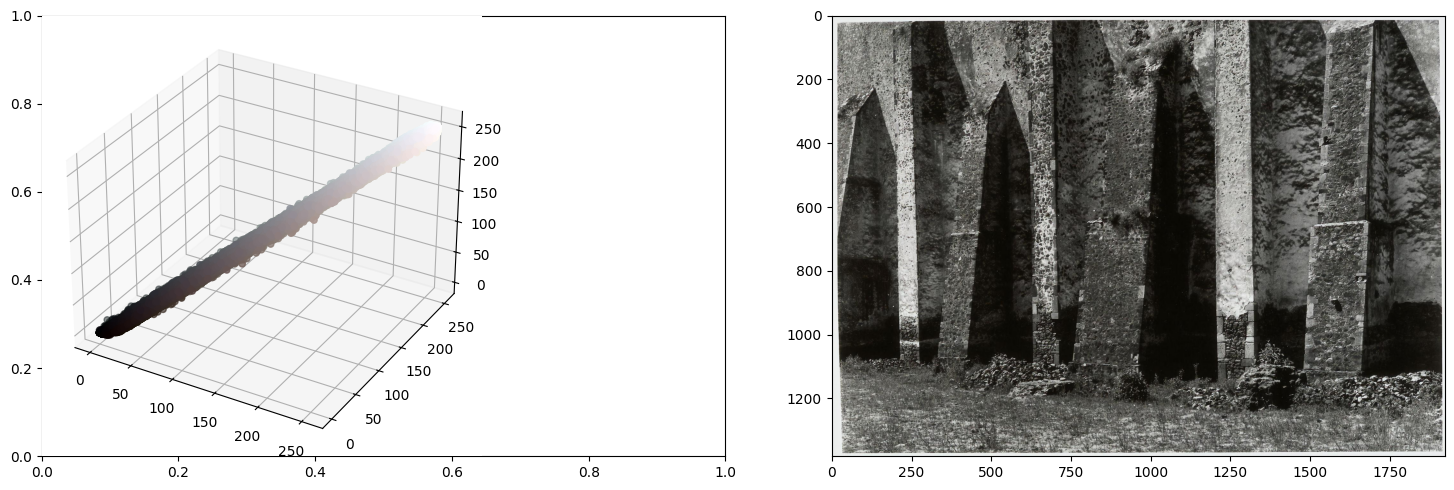

In [134]:
path='datos/archive/Abstract_Expressionism/aaron-siskind_acolman-1-1955.jpg'
image_matrix, image_df = load_image(path=path, print=True)

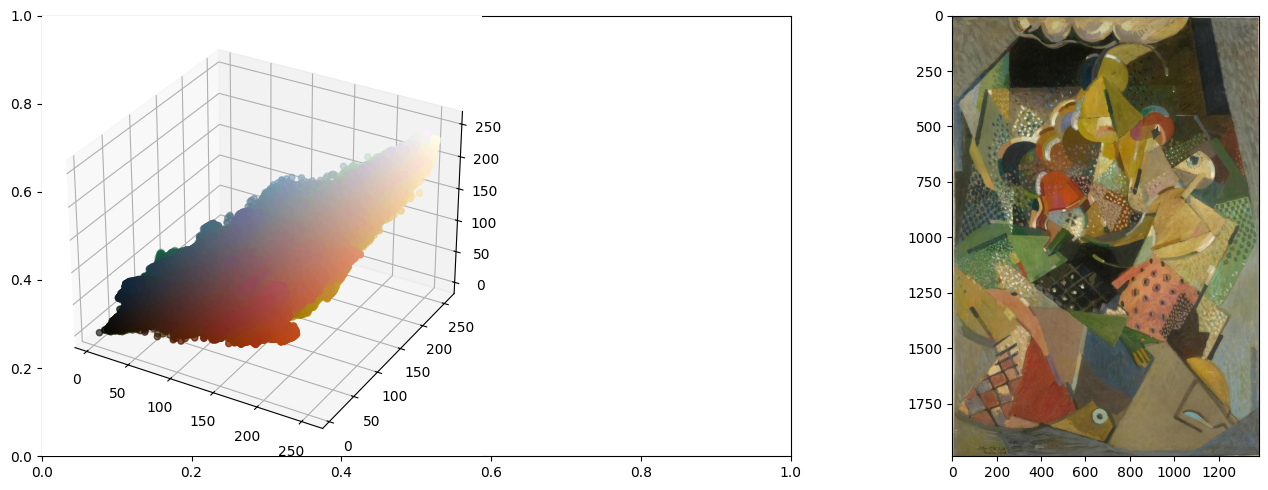

In [85]:
path='datos/archive/Analytical_Cubism/albert-gleizes_acrobats-1916.jpg'
image_matrix, image_df = load_image(path=path, print=True)

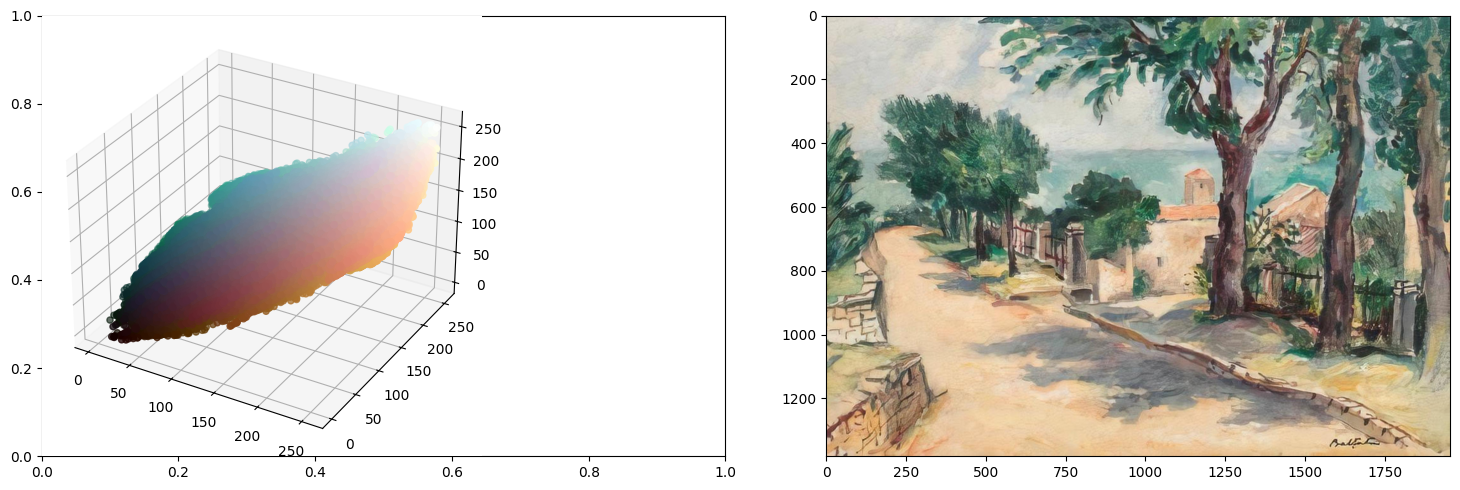

In [139]:
path='datos/archive/Impressionism/adam-baltatu_meridional-landscape.jpg'
image_matrix, image_df = load_image(path=path, print=True)

In [141]:
mejor_modelo = KMeans(n_clusters=6, random_state=0)
mejor_modelo.fit(image_df)

/Users/damenac/workspaces/maia/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=0)

In [137]:
def print_palette(colors) :
    '''
    Prints a palette with the colors in the parameter. 
    '''
    fig, ax = plt.subplots()
    ax.plot([0, 0],[0, 0])

    lenght = 1
    initial_position = 0
    for i in range(len(colors)):
        color=[colors[i][0]/255.0, colors[i][1]/255.0, colors[i][2]/255.0]
        ax.add_patch(Rectangle((initial_position, 0), lenght, 6, color=color))
        initial_position += lenght

    plt.axis('off')
    plt.show()

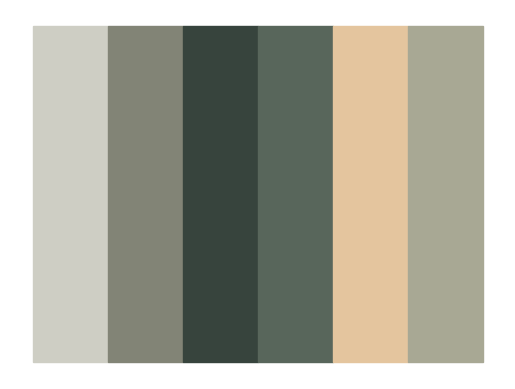

In [142]:
print_palette(mejor_modelo.cluster_centers_)

([<matplotlib.axis.XTick at 0x284139850>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

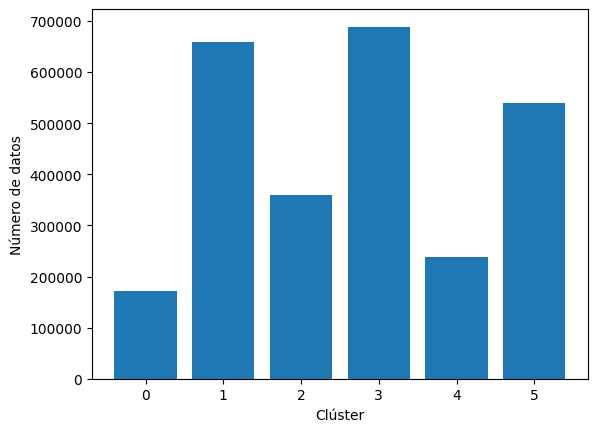

In [14]:
labels = mejor_modelo.labels_
indexes, values = np.unique(labels, return_counts=True)
rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)